In [75]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

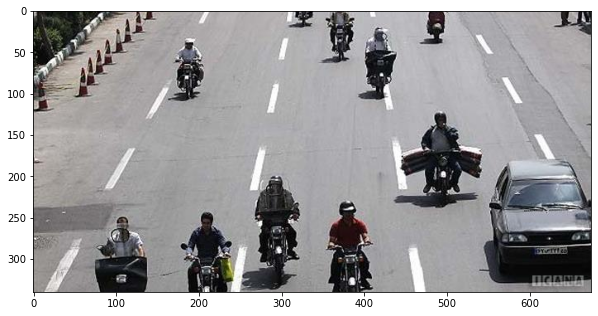

In [103]:
plt.figure(figsize=(10, 8))
base_image_location="C:/Users/srile/Desktop/MDS/Assignments/Task 4.2/vehicles/test_set"

path_to_file=os.path.join(base_image_location, "imtest1.jpeg")
img_data = cv2.imread(path_to_file)

plt.imshow(cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB))

In [104]:
import cv2
import requests

__file__="C:/Users/srile/Desktop/MDS/Assignments/Task 4.2/vehicles/"
Predict_ENDPOINT = 'https://task42ddetect-prediction.cognitiveservices.azure.com/customvision/v3.0/Prediction/c9865fe4-d553-4bee-8daa-2606f4dcef5d/detect/iterations/task42d-detect/image'
prediction_key = '3ea938c591054fe28bab5059e8f4129d'
base_image_location = os.path.join(os.path.dirname(__file__), "test_set")

# Make request and process response
headers = dict()
headers['Prediction-Key'] = prediction_key
headers['Content-Type'] = 'application/octet-stream'

def predict_api_call(path_to_file):
    with open(path_to_file, "rb") as image_contents:
        response = requests.request('post',Predict_ENDPOINT ,data=image_contents, headers=headers)

    if response.status_code == 200 or response.status_code == 201:

        if 'content-length' in response.headers and int(response.headers['content-length']) == 0:
            result = None
        elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str):
            if 'application/json' in response.headers['content-type'].lower():
                result = response.json() if response.content else None
            elif 'image' in response.headers['content-type'].lower():
                result = response.content
    else:
        result=None
    img_data = cv2.imread(path_to_file)
    return img_data, result

path_to_file=os.path.join(base_image_location, "imtest1.jpeg")
img_data, result = predict_api_call(path_to_file)

print(result)

{'id': '0f9c2287-ee48-4cf9-9c43-9cb0e8181c02', 'project': 'c9865fe4-d553-4bee-8daa-2606f4dcef5d', 'iteration': '3d67b471-35c5-4d4f-90aa-c495553164b8', 'created': '2023-04-09T07:49:14.632Z', 'predictions': [{'probability': 0.017866684, 'tagId': 'ceca2f4a-217f-403b-a694-5b4fb6f948d4', 'tagName': 'bicycle', 'boundingBox': {'left': 0.26158795, 'top': 0.6784838, 'width': 0.101061225, 'height': 0.32151622}}, {'probability': 0.016559212, 'tagId': 'ceca2f4a-217f-403b-a694-5b4fb6f948d4', 'tagName': 'bicycle', 'boundingBox': {'left': 0.5237889, 'top': 0.638536, 'width': 0.0942812, 'height': 0.36146402}}, {'probability': 0.014902815, 'tagId': 'ceca2f4a-217f-403b-a694-5b4fb6f948d4', 'tagName': 'bicycle', 'boundingBox': {'left': 0.10871672, 'top': 0.66316485, 'width': 0.09928384, 'height': 0.33683515}}, {'probability': 0.9989323, 'tagId': '6cceb4cb-1c3c-4f09-be09-7b28ce490e4b', 'tagName': 'bike', 'boundingBox': {'left': 0.39601392, 'top': 0.5756524, 'width': 0.084501445, 'height': 0.38287944}}, {'p

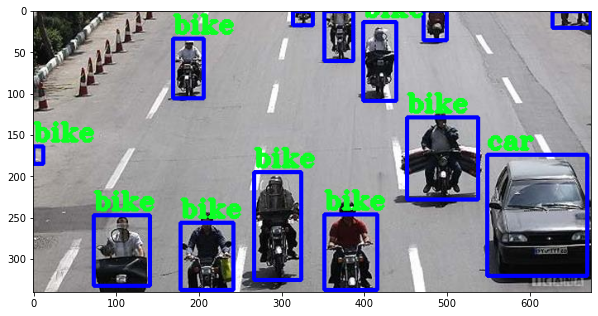

In [106]:
import cv2
import matplotlib.pyplot as plt

height, width, channels = img_data.shape 

plt.figure(figsize=(10, 10))
pred_dict=result['predictions']
for pred in pred_dict:
    if pred['probability'] >= 0.80:
        obj_name=pred['tagName']

        x1 = int(pred['boundingBox']['left']*width)
        x2 = int(x1 + pred['boundingBox']['width']*width)
        y1 = int(pred['boundingBox']['top']*height)
        y2 = int(y1 + pred['boundingBox']['height']*height)

        cv2.rectangle(img_data, (x1,y1), (x2,y2), (255,0,0), 3) 
        cv2.putText(img_data, obj_name, (x1, y1 - 7), cv2.FONT_HERSHEY_TRIPLEX, 1, (36,255,12), 2)


plt.imshow(cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB))

In [137]:
def write_pred_image(img_data,result,n):
    height, width, channels = img_data.shape 

    pred_dict=result['predictions']
    for pred in pred_dict:
        if pred['probability'] >= 0.80:
            obj_name=pred['tagName']

            x1 = int(pred['boundingBox']['left']*width)
            x2 = int(x1 + pred['boundingBox']['width']*width)
            y1 = int(pred['boundingBox']['top']*height)
            y2 = int(y1 + pred['boundingBox']['height']*height)

            cv2.rectangle(img_data, (x1,y1), (x2,y2), (255,0,0), 3) 
            cv2.putText(img_data, obj_name, (x1, y1 - 7), cv2.FONT_HERSHEY_TRIPLEX, 1, (36,255,12), 2)
        

    cv2.imwrite("./predict1/image"+str(n)+".jpg", img_data)

In [138]:
import cv2
vidcap = cv2.VideoCapture('road_traffic.mp4')

image_list=[]
def getFrame(sec):

    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    
    if hasFrames:
        cv2.imwrite("./output1/image"+str(count)+".jpg", image) # save frame as JPG file
        image_list.append(image)
    return hasFrames

sec = 0
frameRate = 0.1 #//it will capture image in each 0.1 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [139]:
len(image_list)

101

In [140]:
base_image_location="C:/Users/srile/Desktop/MDS/Assignments/Task 4.2/output1/"

cnt=0
for image_num in range(1,len(image_list)+1):        
    path_to_file=os.path.join(base_image_location, "image{}.jpg".format(image_num))
    img_data, result = predict_api_call(path_to_file)
    
    write_pred_image(img_data,result,image_num)   
    cnt+=1
    
print("Totally {} images were written in prediction folder".format(cnt))
    

Totally 101 images were written in prediction folder


In [141]:
import cv2
import numpy as np
import glob

img_folder='C:/Users/srile/Desktop/MDS/Assignments/Task 4.2/predict1'
images_ = [img for img in os.listdir(img_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
frame = cv2.imread(os.path.join(img_folder, images_[0]))

height, width, layers = frame.shape  
video_name='road_traffic_out.avi'  
video = cv2.VideoWriter(video_name, 0, 1, (width, height)) 
  
# Appending the images to the video one by one
for image in images_: 
    video.write(cv2.imread(os.path.join(img_folder, image))) 
      
# Deallocating memories taken for window creation
cv2.destroyAllWindows() 
video.release()  # releasing the video generated

Showing images with index in : [41 77 60 50 33]


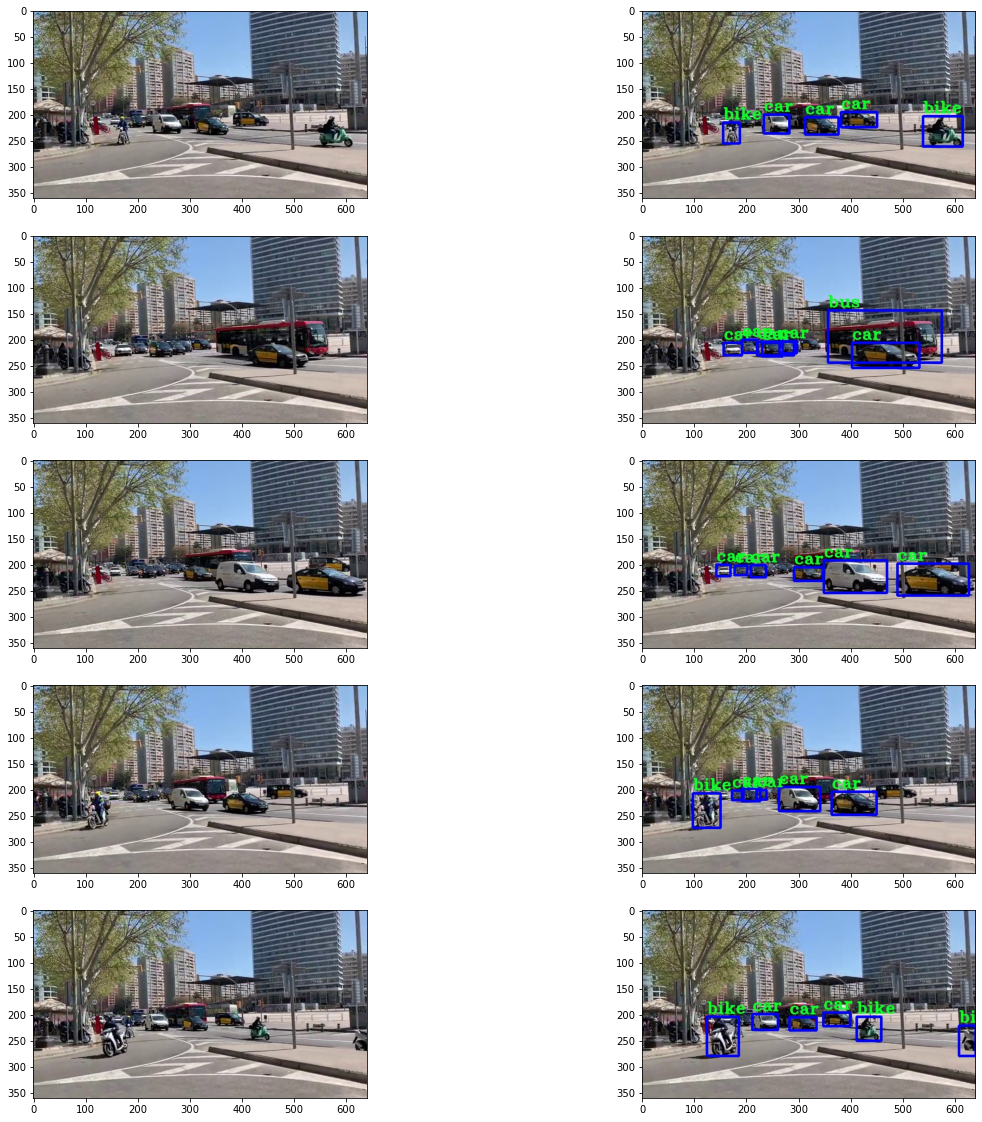

In [122]:
def show_images(n):

    orig_folder='C:/Users/srile/Desktop/MDS/Assignments/Task 4.2/output1'
    pred_folder='C:/Users/srile/Desktop/MDS/Assignments/Task 4.2/predict1'
        
    plt.figure(figsize=(20, 20))
    
    rand = np.random.randint(0, 101, n) # Generating n random numbers from total number of images
    print("Showing images with index in : {}".format(rand))

    for cnt,j in enumerate(rand):
        orig_data = cv2.imread(os.path.join(orig_folder, "image{}.jpg".format(j)))
        pred_data = cv2.imread(os.path.join(pred_folder, "image{}.jpg".format(j))) 
        plt.subplot(n, 2, (cnt*2)+1)
        plt.imshow(cv2.cvtColor(orig_data,cv2.COLOR_BGR2RGB))
        plt.subplot(n, 2, (cnt*2)+2)
        plt.imshow(cv2.cvtColor(pred_data,cv2.COLOR_BGR2RGB))
        
show_images(5)